In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import randint
import joblib

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

from sklearn.model_selection import train_test_split

from xgboost import XGBClassifier

# Analysis:

## 1. Random Forests: 
    ensemble method bagging decision trees (default bootstrapping = True is kept)

In [22]:
pipeline = make_pipeline(StandardScaler(), 
                         RandomForestClassifier(verbose=1))

In [23]:
param_distribs = {'randomforestclassifier__n_estimators': [50, 100, 200], 
                  'randomforestclassifier__max_features': [5, 10, 12],
                  'randomforestclassifier__max_depth': [5, 10, 20]}

In [24]:
grid_search = GridSearchCV(pipeline, param_distribs, cv=2, verbose=1)

In [21]:
param_distribs = {'randomforestclassifier__n_estimators': randint(low=10, high=200), 
                  'randomforestclassifier__max_features': randint(low=1, high=8),
                  'randomforestclassifier__max_depth': randint(low=1, high=25), 
                  'randomforestclassifier__min_samples_leaf': randint(low=5, high=20)}

In [21]:
rnd_search = RandomizedSearchCV(pipeline, param_distributions=param_distribs, 
                                n_iter=20, cv=2, n_jobs=3, random_state=42, verbose=1)

### 1.1. Original set

In [5]:
x = pd.read_csv('processed_data/x_post_preproc.csv', index_col='building_id')
y = pd.read_csv('processed_data/y_post_preproc.csv', index_col='building_id')

In [6]:
x_train, x_test = train_test_split(x, test_size=0.2, random_state=42)
y_train, y_test = y.loc[x_train.index], y.loc[x_test.index]

In [25]:
grid_search.fit(x_train, y_train.values.ravel())

Fitting 2 folds for each of 27 candidates, totalling 54 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    7.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    1.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    7.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    1.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   15.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    3.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(verbose=1))]),
             param_grid={'randomforestclassifier__max_depth': [5, 10, 20],
                         'randomforestclassifier__max_features': [5, 10, 12],
                         'randomforestclassifier__n_estimators': [50, 100,
                                                                  200]},
             verbose=1)

In [26]:
grid_search.best_estimator_

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=20, max_features=12,
                                        n_estimators=200, verbose=1))])

In [27]:
grid_search.best_score_

0.5907983754888302

In [28]:
joblib.dump(grid_search, 'results/rf_gridsearch.joblib', compress=1)

['results/rf_gridsearch.joblib']

In [25]:
rnd_search.fit(x_train, y_train.values.ravel())

Fitting 2 folds for each of 20 candidates, totalling 40 fits


RandomizedSearchCV(cv=2,
                   estimator=Pipeline(steps=[('standardscaler',
                                              StandardScaler()),
                                             ('randomforestclassifier',
                                              RandomForestClassifier())]),
                   n_iter=20, n_jobs=3,
                   param_distributions={'randomforestclassifier__max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000014E42F56E88>,
                                        'randomforestclassifier__max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000014E00764108>,
                                        'randomforestclassifier__min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000014E000776C8>,
                                        'randomforestclassifier__n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000014E00718C08>},
                   random_state=4

In [26]:
rnd_search.best_estimator_

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=19, max_features=7,
                                        min_samples_leaf=15,
                                        n_estimators=97))])

In [28]:
rnd_search.best_score_

0.5795464793847318

In [47]:
joblib.dump(rnd_search, 'results/rf_rs_orig.joblib', compress=1)

['results/rf_rs_orig.joblib']

### 1.2 Resampled set:

#### 1.2.1 Over-sampling with SMOTENC

In [50]:
x_train_smotenc = pd.read_csv('processed_data/resampling/x_train_smotenc.csv', index_col=0).reset_index(drop=True)
y_train_smotenc = pd.read_csv('processed_data/resampling/y_train_smotenc.csv', index_col=0).reset_index(drop=True)

C:\Users\aleciu\Anaconda3\envs\ml\lib\site-packages\numpy\lib\arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [55]:
rnd_search.fit(x_train_smotenc, y_train_smotenc.values.ravel())

Fitting 2 folds for each of 20 candidates, totalling 40 fits


RandomizedSearchCV(cv=2,
                   estimator=Pipeline(steps=[('standardscaler',
                                              StandardScaler()),
                                             ('randomforestclassifier',
                                              RandomForestClassifier())]),
                   n_iter=20, n_jobs=3,
                   param_distributions={'randomforestclassifier__max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000014E42F56E88>,
                                        'randomforestclassifier__max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000014E00764108>,
                                        'randomforestclassifier__min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000014E000776C8>,
                                        'randomforestclassifier__n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000014E00718C08>},
                   random_state=4

In [56]:
rnd_search.best_estimator_

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=19, max_features=7,
                                        min_samples_leaf=15,
                                        n_estimators=97))])

In [57]:
rnd_search.best_score_

0.6117190471877547

In [58]:
joblib.dump(rnd_search, 'results/rf_rs_smotenc.joblib', compress=1)

['results/rf_rs_smotenc.joblib']

### 1.2.2 Under-sampling: cleaning oversampled dataset

#### 1.2.2.1 Tomek

In [60]:
x_train_smotenc_tmk = pd.read_csv('processed_data/resampling/x_train_smotenc_tmk.csv', index_col=0).reset_index(drop=True)
y_train_smotenc_tmk = pd.read_csv('processed_data/resampling/y_train_smotenc_tmk.csv', index_col=0).reset_index(drop=True)

In [61]:
rnd_search.fit(x_train_smotenc_tmk, y_train_smotenc_tmk.values.ravel())

Fitting 2 folds for each of 20 candidates, totalling 40 fits


RandomizedSearchCV(cv=2,
                   estimator=Pipeline(steps=[('standardscaler',
                                              StandardScaler()),
                                             ('randomforestclassifier',
                                              RandomForestClassifier())]),
                   n_iter=20, n_jobs=3,
                   param_distributions={'randomforestclassifier__max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000014E42F56E88>,
                                        'randomforestclassifier__max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000014E00764108>,
                                        'randomforestclassifier__min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000014E000776C8>,
                                        'randomforestclassifier__n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000014E00718C08>},
                   random_state=4

In [62]:
rnd_search.best_estimator_

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=19, max_features=7,
                                        min_samples_leaf=15,
                                        n_estimators=97))])

In [63]:
rnd_search.best_score_

0.6217190870037967

In [64]:
joblib.dump(rnd_search, 'results/rf_rs_smotenc_tmk.joblib', compress=1)

['results/rf_rs_smotenc_tmk.joblib']

#### 1.2.2.2 ENN

In [65]:
x_train_smotenc_enn = pd.read_csv('processed_data/resampling/x_train_smotenc_enn.csv', index_col=0).reset_index(drop=True)
y_train_smotenc_enn = pd.read_csv('processed_data/resampling/y_train_smotenc_enn.csv', index_col=0).reset_index(drop=True)

In [66]:
rnd_search.fit(x_train_smotenc_enn, y_train_smotenc_enn.values.ravel())

Fitting 2 folds for each of 20 candidates, totalling 40 fits


RandomizedSearchCV(cv=2,
                   estimator=Pipeline(steps=[('standardscaler',
                                              StandardScaler()),
                                             ('randomforestclassifier',
                                              RandomForestClassifier())]),
                   n_iter=20, n_jobs=3,
                   param_distributions={'randomforestclassifier__max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000014E42F56E88>,
                                        'randomforestclassifier__max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000014E00764108>,
                                        'randomforestclassifier__min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000014E000776C8>,
                                        'randomforestclassifier__n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000014E00718C08>},
                   random_state=4

In [67]:
rnd_search.best_estimator_

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=19, max_features=7,
                                        min_samples_leaf=15,
                                        n_estimators=97))])

In [68]:
rnd_search.best_score_

0.6595177062565271

In [69]:
joblib.dump(rnd_search, 'results/rf_rs_smotenc_enn.joblib', compress=1)

['results/rf_rs_smotenc_enn.joblib']

## 2. Boosting: 
    ensemble method boosting decision trees

In [21]:
param_distribs = {'randomforestclassifier__n_estimators': randint(low=10, high=200), 
                  'randomforestclassifier__max_features': randint(low=1, high=8),
                  'randomforestclassifier__max_depth': randint(low=1, high=25), 
                  'randomforestclassifier__min_samples_leaf': randint(low=5, high=20)}

In [24]:
pipeline = make_pipeline(StandardScaler(), 
                         RandomForestClassifier())

rnd_search = RandomizedSearchCV(pipeline, param_distributions=param_distribs, 
                                n_iter=20, cv=2, n_jobs=3, random_state=42, verbose=1)

### 1.1. Original set

In [6]:
x = pd.read_csv('processed_data/x_post_preproc.csv', index_col='building_id')
y = pd.read_csv('processed_data/y_post_preproc.csv', index_col='building_id')

In [7]:
x_train, x_test = train_test_split(x, test_size=0.2, random_state=42)
y_train, y_test = y.loc[x_train.index], y.loc[x_test.index]

In [13]:
def display_metrics(classifier, x, y, prediction):

    print("Confusion matrix: \n")
    plt.show(metrics.plot_confusion_matrix(classifier, x, y, normalize='true'))
    
    labels = np.unique(y_test.damage_grade)
    # labels should by default but let's be explicit; also, normalize over the true values, i.e., 
    # return how often a class gets mis-classified or rightly classified
    cm_array = metrics.confusion_matrix(y, prediction, labels=labels, normalize='true')
    cm = pd.DataFrame(cm_array, columns=labels, index=labels)
    
    cf = metrics.classification_report(y, prediction)
    print("Classification report: \n")
    print(cf)

    f1 = metrics.f1_score(y, prediction, average='micro')
    print("Micro-F1 score: \n")
    print(f1)

    f2 = metrics.f1_score(y, prediction, average='macro')
    print("Macro-F1 score:")
    print(f1)
    
    return cm, cf, f1, f2

def scale(x_train, x_test):
    scaler = StandardScaler()
    scaler.fit(x_train)

    x_train = pd.DataFrame(scaler.transform(x_train), 
                           index=x_train.index, 
                           columns=x_train.columns)

    x_test = pd.DataFrame(scaler.transform(x_test),
                          index=x_test.index, 
                          columns=x_test.columns)
    return x_train, x_test

In [14]:
x_train_norm, x_test_norm = scale(x_train, x_test)

- https://stackoverflow.com/questions/57986259/multiclass-classification-with-xgboost-classifier
- https://stackoverflow.com/questions/51587535/custom-evaluation-function-based-on-f1-for-use-in-xgboost-python-api

In [23]:
fit_params = {'early_stopping_rounds': 10,
              'eval_metric': 'merror',
              'eval_set': [(x_test_norm, y_test.values.ravel())]}

param_distribs = {'n_estimators': [50, 100, 200], 
                  'max_depth': [5, 10, 20],
                  'learning_rate': [0.08, 0.15, 0.35]}

In [26]:
grid_search = GridSearchCV(XGBClassifier(), param_distribs, verbose=1, cv=2)
grid_search.fit(x_train_norm, y_train.values.ravel(), **fit_params)

Fitting 2 folds for each of 27 candidates, totalling 54 fits


C:\Users\aleciu\Anaconda3\envs\ml\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-merror:0.45388
[1]	validation_0-merror:0.45267
[2]	validation_0-merror:0.45040
[3]	validation_0-merror:0.45015
[4]	validation_0-merror:0.44964
[5]	validation_0-merror:0.44985
[6]	validation_0-merror:0.44965
[7]	validation_0-merror:0.44936
[8]	validation_0-merror:0.44905
[9]	validation_0-merror:0.44927
[10]	validation_0-merror:0.44891
[11]	validation_0-merror:0.44886
[12]	validation_0-merror:0.44868
[13]	validation_0-merror:0.44850
[14]	validation_0-merror:0.44801
[15]	validation_0-merror:0.44775
[16]	validation_0-merror:0.44755
[17]	validation_0-merror:0.44707
[18]	validation_0-merror:0.44695
[19]	validation_0-merror:0.44678
[20]	validation_0-merror:0.44643
[21]	validation_0-merror:0.44634
[22]	validation_0-merror:0.44609
[23]	validation_0-merror:0.44597
[24]	validation_0-merror:0.44575
[25]	validation_0-merror:0.44573
[26]	validation_0-merror:0.44551
[27]	validation_0-merror:0.44531
[28]	validation_0-merror:0.44528
[29]	validation_0-merror:0.44504
[30]	validation_0-me

C:\Users\aleciu\Anaconda3\envs\ml\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-merror:0.45313
[1]	validation_0-merror:0.45149
[2]	validation_0-merror:0.45063
[3]	validation_0-merror:0.45071
[4]	validation_0-merror:0.45032
[5]	validation_0-merror:0.44991
[6]	validation_0-merror:0.45021
[7]	validation_0-merror:0.45022
[8]	validation_0-merror:0.44978
[9]	validation_0-merror:0.44918
[10]	validation_0-merror:0.44872
[11]	validation_0-merror:0.44853
[12]	validation_0-merror:0.44856
[13]	validation_0-merror:0.44822
[14]	validation_0-merror:0.44784
[15]	validation_0-merror:0.44772
[16]	validation_0-merror:0.44735
[17]	validation_0-merror:0.44737
[18]	validation_0-merror:0.44665
[19]	validation_0-merror:0.44662
[20]	validation_0-merror:0.44660
[21]	validation_0-merror:0.44630
[22]	validation_0-merror:0.44586
[23]	validation_0-merror:0.44567
[24]	validation_0-merror:0.44542
[25]	validation_0-merror:0.44532
[26]	validation_0-merror:0.44517
[27]	validation_0-merror:0.44505
[28]	validation_0-merror:0.44462
[29]	validation_0-merror:0.44445
[30]	validation_0-me

C:\Users\aleciu\Anaconda3\envs\ml\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-merror:0.45388
[1]	validation_0-merror:0.45267
[2]	validation_0-merror:0.45040
[3]	validation_0-merror:0.45015
[4]	validation_0-merror:0.44964
[5]	validation_0-merror:0.44985
[6]	validation_0-merror:0.44965
[7]	validation_0-merror:0.44936
[8]	validation_0-merror:0.44905
[9]	validation_0-merror:0.44927
[10]	validation_0-merror:0.44891
[11]	validation_0-merror:0.44886
[12]	validation_0-merror:0.44868
[13]	validation_0-merror:0.44850
[14]	validation_0-merror:0.44801
[15]	validation_0-merror:0.44775
[16]	validation_0-merror:0.44755
[17]	validation_0-merror:0.44707
[18]	validation_0-merror:0.44695
[19]	validation_0-merror:0.44678
[20]	validation_0-merror:0.44643
[21]	validation_0-merror:0.44634
[22]	validation_0-merror:0.44609
[23]	validation_0-merror:0.44597
[24]	validation_0-merror:0.44575
[25]	validation_0-merror:0.44573
[26]	validation_0-merror:0.44551
[27]	validation_0-merror:0.44531
[28]	validation_0-merror:0.44528
[29]	validation_0-merror:0.44504
[30]	validation_0-me

C:\Users\aleciu\Anaconda3\envs\ml\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-merror:0.45313
[1]	validation_0-merror:0.45149
[2]	validation_0-merror:0.45063
[3]	validation_0-merror:0.45071
[4]	validation_0-merror:0.45032
[5]	validation_0-merror:0.44991
[6]	validation_0-merror:0.45021
[7]	validation_0-merror:0.45022
[8]	validation_0-merror:0.44978
[9]	validation_0-merror:0.44918
[10]	validation_0-merror:0.44872
[11]	validation_0-merror:0.44853
[12]	validation_0-merror:0.44856
[13]	validation_0-merror:0.44822
[14]	validation_0-merror:0.44784
[15]	validation_0-merror:0.44772
[16]	validation_0-merror:0.44735
[17]	validation_0-merror:0.44737
[18]	validation_0-merror:0.44665
[19]	validation_0-merror:0.44662
[20]	validation_0-merror:0.44660
[21]	validation_0-merror:0.44630
[22]	validation_0-merror:0.44586
[23]	validation_0-merror:0.44567
[24]	validation_0-merror:0.44542
[25]	validation_0-merror:0.44532
[26]	validation_0-merror:0.44517
[27]	validation_0-merror:0.44505
[28]	validation_0-merror:0.44462
[29]	validation_0-merror:0.44445
[30]	validation_0-me

C:\Users\aleciu\Anaconda3\envs\ml\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-merror:0.45388
[1]	validation_0-merror:0.45267
[2]	validation_0-merror:0.45040
[3]	validation_0-merror:0.45015
[4]	validation_0-merror:0.44964
[5]	validation_0-merror:0.44985
[6]	validation_0-merror:0.44965
[7]	validation_0-merror:0.44936
[8]	validation_0-merror:0.44905
[9]	validation_0-merror:0.44927
[10]	validation_0-merror:0.44891
[11]	validation_0-merror:0.44886
[12]	validation_0-merror:0.44868
[13]	validation_0-merror:0.44850
[14]	validation_0-merror:0.44801
[15]	validation_0-merror:0.44775
[16]	validation_0-merror:0.44755
[17]	validation_0-merror:0.44707
[18]	validation_0-merror:0.44695
[19]	validation_0-merror:0.44678
[20]	validation_0-merror:0.44643
[21]	validation_0-merror:0.44634
[22]	validation_0-merror:0.44609
[23]	validation_0-merror:0.44597
[24]	validation_0-merror:0.44575
[25]	validation_0-merror:0.44573
[26]	validation_0-merror:0.44551
[27]	validation_0-merror:0.44531
[28]	validation_0-merror:0.44528
[29]	validation_0-merror:0.44504
[30]	validation_0-me

C:\Users\aleciu\Anaconda3\envs\ml\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-merror:0.45313
[1]	validation_0-merror:0.45149
[2]	validation_0-merror:0.45063
[3]	validation_0-merror:0.45071
[4]	validation_0-merror:0.45032
[5]	validation_0-merror:0.44991
[6]	validation_0-merror:0.45021
[7]	validation_0-merror:0.45022
[8]	validation_0-merror:0.44978
[9]	validation_0-merror:0.44918
[10]	validation_0-merror:0.44872
[11]	validation_0-merror:0.44853
[12]	validation_0-merror:0.44856
[13]	validation_0-merror:0.44822
[14]	validation_0-merror:0.44784
[15]	validation_0-merror:0.44772
[16]	validation_0-merror:0.44735
[17]	validation_0-merror:0.44737
[18]	validation_0-merror:0.44665
[19]	validation_0-merror:0.44662
[20]	validation_0-merror:0.44660
[21]	validation_0-merror:0.44630
[22]	validation_0-merror:0.44586
[23]	validation_0-merror:0.44567
[24]	validation_0-merror:0.44542
[25]	validation_0-merror:0.44532
[26]	validation_0-merror:0.44517
[27]	validation_0-merror:0.44505
[28]	validation_0-merror:0.44462
[29]	validation_0-merror:0.44445
[30]	validation_0-me

C:\Users\aleciu\Anaconda3\envs\ml\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-merror:0.43949
[1]	validation_0-merror:0.43800
[2]	validation_0-merror:0.43720
[3]	validation_0-merror:0.43596
[4]	validation_0-merror:0.43492
[5]	validation_0-merror:0.43424
[6]	validation_0-merror:0.43387
[7]	validation_0-merror:0.43354
[8]	validation_0-merror:0.43308
[9]	validation_0-merror:0.43267
[10]	validation_0-merror:0.43266
[11]	validation_0-merror:0.43259
[12]	validation_0-merror:0.43219
[13]	validation_0-merror:0.43156
[14]	validation_0-merror:0.43177
[15]	validation_0-merror:0.43132
[16]	validation_0-merror:0.43096
[17]	validation_0-merror:0.43094
[18]	validation_0-merror:0.43080
[19]	validation_0-merror:0.43035
[20]	validation_0-merror:0.43026
[21]	validation_0-merror:0.42997
[22]	validation_0-merror:0.43009
[23]	validation_0-merror:0.42976
[24]	validation_0-merror:0.42950
[25]	validation_0-merror:0.42951
[26]	validation_0-merror:0.42903
[27]	validation_0-merror:0.42906
[28]	validation_0-merror:0.42915
[29]	validation_0-merror:0.42895
[30]	validation_0-me

C:\Users\aleciu\Anaconda3\envs\ml\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-merror:0.43997
[1]	validation_0-merror:0.43633
[2]	validation_0-merror:0.43541
[3]	validation_0-merror:0.43386
[4]	validation_0-merror:0.43303
[5]	validation_0-merror:0.43296
[6]	validation_0-merror:0.43259
[7]	validation_0-merror:0.43241
[8]	validation_0-merror:0.43212
[9]	validation_0-merror:0.43154
[10]	validation_0-merror:0.43125
[11]	validation_0-merror:0.43121
[12]	validation_0-merror:0.43105
[13]	validation_0-merror:0.43079
[14]	validation_0-merror:0.43029
[15]	validation_0-merror:0.42980
[16]	validation_0-merror:0.42945
[17]	validation_0-merror:0.42921
[18]	validation_0-merror:0.42917
[19]	validation_0-merror:0.42873
[20]	validation_0-merror:0.42851
[21]	validation_0-merror:0.42845
[22]	validation_0-merror:0.42822
[23]	validation_0-merror:0.42814
[24]	validation_0-merror:0.42779
[25]	validation_0-merror:0.42788
[26]	validation_0-merror:0.42763
[27]	validation_0-merror:0.42749
[28]	validation_0-merror:0.42738
[29]	validation_0-merror:0.42722
[30]	validation_0-me

C:\Users\aleciu\Anaconda3\envs\ml\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-merror:0.43949
[1]	validation_0-merror:0.43800
[2]	validation_0-merror:0.43720
[3]	validation_0-merror:0.43596
[4]	validation_0-merror:0.43492
[5]	validation_0-merror:0.43424
[6]	validation_0-merror:0.43387
[7]	validation_0-merror:0.43354
[8]	validation_0-merror:0.43308
[9]	validation_0-merror:0.43267
[10]	validation_0-merror:0.43266
[11]	validation_0-merror:0.43259
[12]	validation_0-merror:0.43219
[13]	validation_0-merror:0.43156
[14]	validation_0-merror:0.43177
[15]	validation_0-merror:0.43132
[16]	validation_0-merror:0.43096
[17]	validation_0-merror:0.43094
[18]	validation_0-merror:0.43080
[19]	validation_0-merror:0.43035
[20]	validation_0-merror:0.43026
[21]	validation_0-merror:0.42997
[22]	validation_0-merror:0.43009
[23]	validation_0-merror:0.42976
[24]	validation_0-merror:0.42950
[25]	validation_0-merror:0.42951
[26]	validation_0-merror:0.42903
[27]	validation_0-merror:0.42906
[28]	validation_0-merror:0.42915
[29]	validation_0-merror:0.42895
[30]	validation_0-me

C:\Users\aleciu\Anaconda3\envs\ml\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-merror:0.43997
[1]	validation_0-merror:0.43633
[2]	validation_0-merror:0.43541
[3]	validation_0-merror:0.43386
[4]	validation_0-merror:0.43303
[5]	validation_0-merror:0.43296
[6]	validation_0-merror:0.43259
[7]	validation_0-merror:0.43241
[8]	validation_0-merror:0.43212
[9]	validation_0-merror:0.43154
[10]	validation_0-merror:0.43125
[11]	validation_0-merror:0.43121
[12]	validation_0-merror:0.43105
[13]	validation_0-merror:0.43079
[14]	validation_0-merror:0.43029
[15]	validation_0-merror:0.42980
[16]	validation_0-merror:0.42945
[17]	validation_0-merror:0.42921
[18]	validation_0-merror:0.42917
[19]	validation_0-merror:0.42873
[20]	validation_0-merror:0.42851
[21]	validation_0-merror:0.42845
[22]	validation_0-merror:0.42822
[23]	validation_0-merror:0.42814
[24]	validation_0-merror:0.42779
[25]	validation_0-merror:0.42788
[26]	validation_0-merror:0.42763
[27]	validation_0-merror:0.42749
[28]	validation_0-merror:0.42738
[29]	validation_0-merror:0.42722
[30]	validation_0-me

C:\Users\aleciu\Anaconda3\envs\ml\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-merror:0.43949
[1]	validation_0-merror:0.43800
[2]	validation_0-merror:0.43720
[3]	validation_0-merror:0.43596
[4]	validation_0-merror:0.43492
[5]	validation_0-merror:0.43424
[6]	validation_0-merror:0.43387
[7]	validation_0-merror:0.43354
[8]	validation_0-merror:0.43308
[9]	validation_0-merror:0.43267
[10]	validation_0-merror:0.43266
[11]	validation_0-merror:0.43259
[12]	validation_0-merror:0.43219
[13]	validation_0-merror:0.43156
[14]	validation_0-merror:0.43177
[15]	validation_0-merror:0.43132
[16]	validation_0-merror:0.43096
[17]	validation_0-merror:0.43094
[18]	validation_0-merror:0.43080
[19]	validation_0-merror:0.43035
[20]	validation_0-merror:0.43026
[21]	validation_0-merror:0.42997
[22]	validation_0-merror:0.43009
[23]	validation_0-merror:0.42976
[24]	validation_0-merror:0.42950
[25]	validation_0-merror:0.42951
[26]	validation_0-merror:0.42903
[27]	validation_0-merror:0.42906
[28]	validation_0-merror:0.42915
[29]	validation_0-merror:0.42895
[30]	validation_0-me

C:\Users\aleciu\Anaconda3\envs\ml\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-merror:0.43997
[1]	validation_0-merror:0.43633
[2]	validation_0-merror:0.43541
[3]	validation_0-merror:0.43386
[4]	validation_0-merror:0.43303
[5]	validation_0-merror:0.43296
[6]	validation_0-merror:0.43259
[7]	validation_0-merror:0.43241
[8]	validation_0-merror:0.43212
[9]	validation_0-merror:0.43154
[10]	validation_0-merror:0.43125
[11]	validation_0-merror:0.43121
[12]	validation_0-merror:0.43105
[13]	validation_0-merror:0.43079
[14]	validation_0-merror:0.43029
[15]	validation_0-merror:0.42980
[16]	validation_0-merror:0.42945
[17]	validation_0-merror:0.42921
[18]	validation_0-merror:0.42917
[19]	validation_0-merror:0.42873
[20]	validation_0-merror:0.42851
[21]	validation_0-merror:0.42845
[22]	validation_0-merror:0.42822
[23]	validation_0-merror:0.42814
[24]	validation_0-merror:0.42779
[25]	validation_0-merror:0.42788
[26]	validation_0-merror:0.42763
[27]	validation_0-merror:0.42749
[28]	validation_0-merror:0.42738
[29]	validation_0-merror:0.42722
[30]	validation_0-me

C:\Users\aleciu\Anaconda3\envs\ml\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-merror:0.44604
[1]	validation_0-merror:0.43593
[2]	validation_0-merror:0.43207
[3]	validation_0-merror:0.42885
[4]	validation_0-merror:0.42674
[5]	validation_0-merror:0.42630
[6]	validation_0-merror:0.42518
[7]	validation_0-merror:0.42542
[8]	validation_0-merror:0.42464
[9]	validation_0-merror:0.42356
[10]	validation_0-merror:0.42369
[11]	validation_0-merror:0.42318
[12]	validation_0-merror:0.42306
[13]	validation_0-merror:0.42274
[14]	validation_0-merror:0.42222
[15]	validation_0-merror:0.42224
[16]	validation_0-merror:0.42235
[17]	validation_0-merror:0.42210
[18]	validation_0-merror:0.42191
[19]	validation_0-merror:0.42158
[20]	validation_0-merror:0.42179
[21]	validation_0-merror:0.42215
[22]	validation_0-merror:0.42194
[23]	validation_0-merror:0.42206
[24]	validation_0-merror:0.42182
[25]	validation_0-merror:0.42186
[26]	validation_0-merror:0.42196
[27]	validation_0-merror:0.42187
[28]	validation_0-merror:0.42184


C:\Users\aleciu\Anaconda3\envs\ml\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-merror:0.44740
[1]	validation_0-merror:0.43816
[2]	validation_0-merror:0.43219
[3]	validation_0-merror:0.42825
[4]	validation_0-merror:0.42642
[5]	validation_0-merror:0.42547
[6]	validation_0-merror:0.42451
[7]	validation_0-merror:0.42361
[8]	validation_0-merror:0.42319
[9]	validation_0-merror:0.42313
[10]	validation_0-merror:0.42241
[11]	validation_0-merror:0.42258
[12]	validation_0-merror:0.42192
[13]	validation_0-merror:0.42157
[14]	validation_0-merror:0.42133
[15]	validation_0-merror:0.42120
[16]	validation_0-merror:0.42086
[17]	validation_0-merror:0.42062
[18]	validation_0-merror:0.42014
[19]	validation_0-merror:0.41990
[20]	validation_0-merror:0.42006
[21]	validation_0-merror:0.42012
[22]	validation_0-merror:0.41980
[23]	validation_0-merror:0.41996
[24]	validation_0-merror:0.42011
[25]	validation_0-merror:0.41983
[26]	validation_0-merror:0.41980
[27]	validation_0-merror:0.42005
[28]	validation_0-merror:0.41986
[29]	validation_0-merror:0.42003
[30]	validation_0-me

C:\Users\aleciu\Anaconda3\envs\ml\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-merror:0.44604
[1]	validation_0-merror:0.43593
[2]	validation_0-merror:0.43207
[3]	validation_0-merror:0.42885
[4]	validation_0-merror:0.42674
[5]	validation_0-merror:0.42630
[6]	validation_0-merror:0.42518
[7]	validation_0-merror:0.42542
[8]	validation_0-merror:0.42464
[9]	validation_0-merror:0.42356
[10]	validation_0-merror:0.42369
[11]	validation_0-merror:0.42318
[12]	validation_0-merror:0.42306
[13]	validation_0-merror:0.42274
[14]	validation_0-merror:0.42222
[15]	validation_0-merror:0.42224
[16]	validation_0-merror:0.42235
[17]	validation_0-merror:0.42210
[18]	validation_0-merror:0.42191
[19]	validation_0-merror:0.42158
[20]	validation_0-merror:0.42179
[21]	validation_0-merror:0.42215
[22]	validation_0-merror:0.42194
[23]	validation_0-merror:0.42206
[24]	validation_0-merror:0.42182
[25]	validation_0-merror:0.42186
[26]	validation_0-merror:0.42196
[27]	validation_0-merror:0.42187
[28]	validation_0-merror:0.42184


C:\Users\aleciu\Anaconda3\envs\ml\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-merror:0.44740
[1]	validation_0-merror:0.43816
[2]	validation_0-merror:0.43219
[3]	validation_0-merror:0.42825
[4]	validation_0-merror:0.42642
[5]	validation_0-merror:0.42547
[6]	validation_0-merror:0.42451
[7]	validation_0-merror:0.42361
[8]	validation_0-merror:0.42319
[9]	validation_0-merror:0.42313
[10]	validation_0-merror:0.42241
[11]	validation_0-merror:0.42258
[12]	validation_0-merror:0.42192
[13]	validation_0-merror:0.42157
[14]	validation_0-merror:0.42133
[15]	validation_0-merror:0.42120
[16]	validation_0-merror:0.42086
[17]	validation_0-merror:0.42062
[18]	validation_0-merror:0.42014
[19]	validation_0-merror:0.41990
[20]	validation_0-merror:0.42006
[21]	validation_0-merror:0.42012
[22]	validation_0-merror:0.41980
[23]	validation_0-merror:0.41996
[24]	validation_0-merror:0.42011
[25]	validation_0-merror:0.41983
[26]	validation_0-merror:0.41980
[27]	validation_0-merror:0.42005
[28]	validation_0-merror:0.41986
[29]	validation_0-merror:0.42003
[30]	validation_0-me

C:\Users\aleciu\Anaconda3\envs\ml\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-merror:0.44604
[1]	validation_0-merror:0.43593
[2]	validation_0-merror:0.43207
[3]	validation_0-merror:0.42885
[4]	validation_0-merror:0.42674
[5]	validation_0-merror:0.42630
[6]	validation_0-merror:0.42518
[7]	validation_0-merror:0.42542
[8]	validation_0-merror:0.42464
[9]	validation_0-merror:0.42356
[10]	validation_0-merror:0.42369
[11]	validation_0-merror:0.42318
[12]	validation_0-merror:0.42306
[13]	validation_0-merror:0.42274
[14]	validation_0-merror:0.42222
[15]	validation_0-merror:0.42224
[16]	validation_0-merror:0.42235
[17]	validation_0-merror:0.42210
[18]	validation_0-merror:0.42191
[19]	validation_0-merror:0.42158
[20]	validation_0-merror:0.42179
[21]	validation_0-merror:0.42215
[22]	validation_0-merror:0.42194
[23]	validation_0-merror:0.42206
[24]	validation_0-merror:0.42182
[25]	validation_0-merror:0.42186
[26]	validation_0-merror:0.42196
[27]	validation_0-merror:0.42187
[28]	validation_0-merror:0.42184


C:\Users\aleciu\Anaconda3\envs\ml\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-merror:0.44740
[1]	validation_0-merror:0.43816
[2]	validation_0-merror:0.43219
[3]	validation_0-merror:0.42825
[4]	validation_0-merror:0.42642
[5]	validation_0-merror:0.42547
[6]	validation_0-merror:0.42451
[7]	validation_0-merror:0.42361
[8]	validation_0-merror:0.42319
[9]	validation_0-merror:0.42313
[10]	validation_0-merror:0.42241
[11]	validation_0-merror:0.42258
[12]	validation_0-merror:0.42192
[13]	validation_0-merror:0.42157
[14]	validation_0-merror:0.42133
[15]	validation_0-merror:0.42120
[16]	validation_0-merror:0.42086
[17]	validation_0-merror:0.42062
[18]	validation_0-merror:0.42014
[19]	validation_0-merror:0.41990
[20]	validation_0-merror:0.42006
[21]	validation_0-merror:0.42012
[22]	validation_0-merror:0.41980
[23]	validation_0-merror:0.41996
[24]	validation_0-merror:0.42011
[25]	validation_0-merror:0.41983
[26]	validation_0-merror:0.41980
[27]	validation_0-merror:0.42005
[28]	validation_0-merror:0.41986
[29]	validation_0-merror:0.42003
[30]	validation_0-me

C:\Users\aleciu\Anaconda3\envs\ml\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-merror:0.45388
[1]	validation_0-merror:0.45092
[2]	validation_0-merror:0.44992
[3]	validation_0-merror:0.44971
[4]	validation_0-merror:0.44937
[5]	validation_0-merror:0.44887
[6]	validation_0-merror:0.44793
[7]	validation_0-merror:0.44802
[8]	validation_0-merror:0.44766
[9]	validation_0-merror:0.44706
[10]	validation_0-merror:0.44710
[11]	validation_0-merror:0.44626
[12]	validation_0-merror:0.44637
[13]	validation_0-merror:0.44609
[14]	validation_0-merror:0.44566
[15]	validation_0-merror:0.44508
[16]	validation_0-merror:0.44475
[17]	validation_0-merror:0.44433
[18]	validation_0-merror:0.44378
[19]	validation_0-merror:0.44348
[20]	validation_0-merror:0.44341
[21]	validation_0-merror:0.44324
[22]	validation_0-merror:0.44263
[23]	validation_0-merror:0.44227
[24]	validation_0-merror:0.44193
[25]	validation_0-merror:0.44205
[26]	validation_0-merror:0.44144
[27]	validation_0-merror:0.44133
[28]	validation_0-merror:0.44098
[29]	validation_0-merror:0.44086
[30]	validation_0-me

C:\Users\aleciu\Anaconda3\envs\ml\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-merror:0.45313
[1]	validation_0-merror:0.45131
[2]	validation_0-merror:0.45026
[3]	validation_0-merror:0.44996
[4]	validation_0-merror:0.44956
[5]	validation_0-merror:0.44852
[6]	validation_0-merror:0.44801
[7]	validation_0-merror:0.44784
[8]	validation_0-merror:0.44729
[9]	validation_0-merror:0.44672
[10]	validation_0-merror:0.44640
[11]	validation_0-merror:0.44627
[12]	validation_0-merror:0.44611
[13]	validation_0-merror:0.44520
[14]	validation_0-merror:0.44496
[15]	validation_0-merror:0.44462
[16]	validation_0-merror:0.44409
[17]	validation_0-merror:0.44369
[18]	validation_0-merror:0.44351
[19]	validation_0-merror:0.44327
[20]	validation_0-merror:0.44288
[21]	validation_0-merror:0.44247
[22]	validation_0-merror:0.44220
[23]	validation_0-merror:0.44190
[24]	validation_0-merror:0.44176
[25]	validation_0-merror:0.44160
[26]	validation_0-merror:0.44113
[27]	validation_0-merror:0.44120
[28]	validation_0-merror:0.44076
[29]	validation_0-merror:0.44060
[30]	validation_0-me

C:\Users\aleciu\Anaconda3\envs\ml\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-merror:0.45388
[1]	validation_0-merror:0.45092
[2]	validation_0-merror:0.44992
[3]	validation_0-merror:0.44971
[4]	validation_0-merror:0.44937
[5]	validation_0-merror:0.44887
[6]	validation_0-merror:0.44793
[7]	validation_0-merror:0.44802
[8]	validation_0-merror:0.44766
[9]	validation_0-merror:0.44706
[10]	validation_0-merror:0.44710
[11]	validation_0-merror:0.44626
[12]	validation_0-merror:0.44637
[13]	validation_0-merror:0.44609
[14]	validation_0-merror:0.44566
[15]	validation_0-merror:0.44508
[16]	validation_0-merror:0.44475
[17]	validation_0-merror:0.44433
[18]	validation_0-merror:0.44378
[19]	validation_0-merror:0.44348
[20]	validation_0-merror:0.44341
[21]	validation_0-merror:0.44324
[22]	validation_0-merror:0.44263
[23]	validation_0-merror:0.44227
[24]	validation_0-merror:0.44193
[25]	validation_0-merror:0.44205
[26]	validation_0-merror:0.44144
[27]	validation_0-merror:0.44133
[28]	validation_0-merror:0.44098
[29]	validation_0-merror:0.44086
[30]	validation_0-me

C:\Users\aleciu\Anaconda3\envs\ml\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-merror:0.45313
[1]	validation_0-merror:0.45131
[2]	validation_0-merror:0.45026
[3]	validation_0-merror:0.44996
[4]	validation_0-merror:0.44956
[5]	validation_0-merror:0.44852
[6]	validation_0-merror:0.44801
[7]	validation_0-merror:0.44784
[8]	validation_0-merror:0.44729
[9]	validation_0-merror:0.44672
[10]	validation_0-merror:0.44640
[11]	validation_0-merror:0.44627
[12]	validation_0-merror:0.44611
[13]	validation_0-merror:0.44520
[14]	validation_0-merror:0.44496
[15]	validation_0-merror:0.44462
[16]	validation_0-merror:0.44409
[17]	validation_0-merror:0.44369
[18]	validation_0-merror:0.44351
[19]	validation_0-merror:0.44327
[20]	validation_0-merror:0.44288
[21]	validation_0-merror:0.44247
[22]	validation_0-merror:0.44220
[23]	validation_0-merror:0.44190
[24]	validation_0-merror:0.44176
[25]	validation_0-merror:0.44160
[26]	validation_0-merror:0.44113
[27]	validation_0-merror:0.44120
[28]	validation_0-merror:0.44076
[29]	validation_0-merror:0.44060
[30]	validation_0-me

C:\Users\aleciu\Anaconda3\envs\ml\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-merror:0.45388
[1]	validation_0-merror:0.45092
[2]	validation_0-merror:0.44992
[3]	validation_0-merror:0.44971
[4]	validation_0-merror:0.44937
[5]	validation_0-merror:0.44887
[6]	validation_0-merror:0.44793
[7]	validation_0-merror:0.44802
[8]	validation_0-merror:0.44766
[9]	validation_0-merror:0.44706
[10]	validation_0-merror:0.44710
[11]	validation_0-merror:0.44626
[12]	validation_0-merror:0.44637
[13]	validation_0-merror:0.44609
[14]	validation_0-merror:0.44566
[15]	validation_0-merror:0.44508
[16]	validation_0-merror:0.44475
[17]	validation_0-merror:0.44433
[18]	validation_0-merror:0.44378
[19]	validation_0-merror:0.44348
[20]	validation_0-merror:0.44341
[21]	validation_0-merror:0.44324
[22]	validation_0-merror:0.44263
[23]	validation_0-merror:0.44227
[24]	validation_0-merror:0.44193
[25]	validation_0-merror:0.44205
[26]	validation_0-merror:0.44144
[27]	validation_0-merror:0.44133
[28]	validation_0-merror:0.44098
[29]	validation_0-merror:0.44086
[30]	validation_0-me

C:\Users\aleciu\Anaconda3\envs\ml\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-merror:0.45313
[1]	validation_0-merror:0.45131
[2]	validation_0-merror:0.45026
[3]	validation_0-merror:0.44996
[4]	validation_0-merror:0.44956
[5]	validation_0-merror:0.44852
[6]	validation_0-merror:0.44801
[7]	validation_0-merror:0.44784
[8]	validation_0-merror:0.44729
[9]	validation_0-merror:0.44672
[10]	validation_0-merror:0.44640
[11]	validation_0-merror:0.44627
[12]	validation_0-merror:0.44611
[13]	validation_0-merror:0.44520
[14]	validation_0-merror:0.44496
[15]	validation_0-merror:0.44462
[16]	validation_0-merror:0.44409
[17]	validation_0-merror:0.44369
[18]	validation_0-merror:0.44351
[19]	validation_0-merror:0.44327
[20]	validation_0-merror:0.44288
[21]	validation_0-merror:0.44247
[22]	validation_0-merror:0.44220
[23]	validation_0-merror:0.44190
[24]	validation_0-merror:0.44176
[25]	validation_0-merror:0.44160
[26]	validation_0-merror:0.44113
[27]	validation_0-merror:0.44120
[28]	validation_0-merror:0.44076
[29]	validation_0-merror:0.44060
[30]	validation_0-me

C:\Users\aleciu\Anaconda3\envs\ml\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-merror:0.43949
[1]	validation_0-merror:0.43600
[2]	validation_0-merror:0.43409
[3]	validation_0-merror:0.43361
[4]	validation_0-merror:0.43281
[5]	validation_0-merror:0.43262
[6]	validation_0-merror:0.43218
[7]	validation_0-merror:0.43138
[8]	validation_0-merror:0.43116
[9]	validation_0-merror:0.43107
[10]	validation_0-merror:0.43073
[11]	validation_0-merror:0.43057
[12]	validation_0-merror:0.43038
[13]	validation_0-merror:0.42981
[14]	validation_0-merror:0.42950
[15]	validation_0-merror:0.42916
[16]	validation_0-merror:0.42893
[17]	validation_0-merror:0.42875
[18]	validation_0-merror:0.42823
[19]	validation_0-merror:0.42768
[20]	validation_0-merror:0.42765
[21]	validation_0-merror:0.42750
[22]	validation_0-merror:0.42713
[23]	validation_0-merror:0.42665
[24]	validation_0-merror:0.42642
[25]	validation_0-merror:0.42610
[26]	validation_0-merror:0.42583
[27]	validation_0-merror:0.42546
[28]	validation_0-merror:0.42520
[29]	validation_0-merror:0.42504
[30]	validation_0-me

C:\Users\aleciu\Anaconda3\envs\ml\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-merror:0.43997
[1]	validation_0-merror:0.43682
[2]	validation_0-merror:0.43441
[3]	validation_0-merror:0.43371
[4]	validation_0-merror:0.43260
[5]	validation_0-merror:0.43182
[6]	validation_0-merror:0.43164
[7]	validation_0-merror:0.43052
[8]	validation_0-merror:0.42989
[9]	validation_0-merror:0.42958
[10]	validation_0-merror:0.42915
[11]	validation_0-merror:0.42869
[12]	validation_0-merror:0.42831
[13]	validation_0-merror:0.42777
[14]	validation_0-merror:0.42769
[15]	validation_0-merror:0.42751
[16]	validation_0-merror:0.42722
[17]	validation_0-merror:0.42644
[18]	validation_0-merror:0.42644
[19]	validation_0-merror:0.42624
[20]	validation_0-merror:0.42599
[21]	validation_0-merror:0.42554
[22]	validation_0-merror:0.42530
[23]	validation_0-merror:0.42506
[24]	validation_0-merror:0.42451
[25]	validation_0-merror:0.42436
[26]	validation_0-merror:0.42409
[27]	validation_0-merror:0.42386
[28]	validation_0-merror:0.42366
[29]	validation_0-merror:0.42362
[30]	validation_0-me

C:\Users\aleciu\Anaconda3\envs\ml\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-merror:0.43949
[1]	validation_0-merror:0.43600
[2]	validation_0-merror:0.43409
[3]	validation_0-merror:0.43361
[4]	validation_0-merror:0.43281
[5]	validation_0-merror:0.43262
[6]	validation_0-merror:0.43218
[7]	validation_0-merror:0.43138
[8]	validation_0-merror:0.43116
[9]	validation_0-merror:0.43107
[10]	validation_0-merror:0.43073
[11]	validation_0-merror:0.43057
[12]	validation_0-merror:0.43038
[13]	validation_0-merror:0.42981
[14]	validation_0-merror:0.42950
[15]	validation_0-merror:0.42916
[16]	validation_0-merror:0.42893
[17]	validation_0-merror:0.42875
[18]	validation_0-merror:0.42823
[19]	validation_0-merror:0.42768
[20]	validation_0-merror:0.42765
[21]	validation_0-merror:0.42750
[22]	validation_0-merror:0.42713
[23]	validation_0-merror:0.42665
[24]	validation_0-merror:0.42642
[25]	validation_0-merror:0.42610
[26]	validation_0-merror:0.42583
[27]	validation_0-merror:0.42546
[28]	validation_0-merror:0.42520
[29]	validation_0-merror:0.42504
[30]	validation_0-me

C:\Users\aleciu\Anaconda3\envs\ml\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-merror:0.43997
[1]	validation_0-merror:0.43682
[2]	validation_0-merror:0.43441
[3]	validation_0-merror:0.43371
[4]	validation_0-merror:0.43260
[5]	validation_0-merror:0.43182
[6]	validation_0-merror:0.43164
[7]	validation_0-merror:0.43052
[8]	validation_0-merror:0.42989
[9]	validation_0-merror:0.42958
[10]	validation_0-merror:0.42915
[11]	validation_0-merror:0.42869
[12]	validation_0-merror:0.42831
[13]	validation_0-merror:0.42777
[14]	validation_0-merror:0.42769
[15]	validation_0-merror:0.42751
[16]	validation_0-merror:0.42722
[17]	validation_0-merror:0.42644
[18]	validation_0-merror:0.42644
[19]	validation_0-merror:0.42624
[20]	validation_0-merror:0.42599
[21]	validation_0-merror:0.42554
[22]	validation_0-merror:0.42530
[23]	validation_0-merror:0.42506
[24]	validation_0-merror:0.42451
[25]	validation_0-merror:0.42436
[26]	validation_0-merror:0.42409
[27]	validation_0-merror:0.42386
[28]	validation_0-merror:0.42366
[29]	validation_0-merror:0.42362
[30]	validation_0-me

C:\Users\aleciu\Anaconda3\envs\ml\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-merror:0.43949
[1]	validation_0-merror:0.43600
[2]	validation_0-merror:0.43409
[3]	validation_0-merror:0.43361
[4]	validation_0-merror:0.43281
[5]	validation_0-merror:0.43262
[6]	validation_0-merror:0.43218
[7]	validation_0-merror:0.43138
[8]	validation_0-merror:0.43116
[9]	validation_0-merror:0.43107
[10]	validation_0-merror:0.43073
[11]	validation_0-merror:0.43057
[12]	validation_0-merror:0.43038
[13]	validation_0-merror:0.42981
[14]	validation_0-merror:0.42950
[15]	validation_0-merror:0.42916
[16]	validation_0-merror:0.42893
[17]	validation_0-merror:0.42875
[18]	validation_0-merror:0.42823
[19]	validation_0-merror:0.42768
[20]	validation_0-merror:0.42765
[21]	validation_0-merror:0.42750
[22]	validation_0-merror:0.42713
[23]	validation_0-merror:0.42665
[24]	validation_0-merror:0.42642
[25]	validation_0-merror:0.42610
[26]	validation_0-merror:0.42583
[27]	validation_0-merror:0.42546
[28]	validation_0-merror:0.42520
[29]	validation_0-merror:0.42504
[30]	validation_0-me

C:\Users\aleciu\Anaconda3\envs\ml\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-merror:0.43997
[1]	validation_0-merror:0.43682
[2]	validation_0-merror:0.43441
[3]	validation_0-merror:0.43371
[4]	validation_0-merror:0.43260
[5]	validation_0-merror:0.43182
[6]	validation_0-merror:0.43164
[7]	validation_0-merror:0.43052
[8]	validation_0-merror:0.42989
[9]	validation_0-merror:0.42958
[10]	validation_0-merror:0.42915
[11]	validation_0-merror:0.42869
[12]	validation_0-merror:0.42831
[13]	validation_0-merror:0.42777
[14]	validation_0-merror:0.42769
[15]	validation_0-merror:0.42751
[16]	validation_0-merror:0.42722
[17]	validation_0-merror:0.42644
[18]	validation_0-merror:0.42644
[19]	validation_0-merror:0.42624
[20]	validation_0-merror:0.42599
[21]	validation_0-merror:0.42554
[22]	validation_0-merror:0.42530
[23]	validation_0-merror:0.42506
[24]	validation_0-merror:0.42451
[25]	validation_0-merror:0.42436
[26]	validation_0-merror:0.42409
[27]	validation_0-merror:0.42386
[28]	validation_0-merror:0.42366
[29]	validation_0-merror:0.42362
[30]	validation_0-me

C:\Users\aleciu\Anaconda3\envs\ml\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-merror:0.44604
[1]	validation_0-merror:0.43453
[2]	validation_0-merror:0.43072
[3]	validation_0-merror:0.42757
[4]	validation_0-merror:0.42648
[5]	validation_0-merror:0.42516
[6]	validation_0-merror:0.42382
[7]	validation_0-merror:0.42367
[8]	validation_0-merror:0.42372
[9]	validation_0-merror:0.42245
[10]	validation_0-merror:0.42261
[11]	validation_0-merror:0.42235
[12]	validation_0-merror:0.42229
[13]	validation_0-merror:0.42255
[14]	validation_0-merror:0.42238
[15]	validation_0-merror:0.42229
[16]	validation_0-merror:0.42217
[17]	validation_0-merror:0.42189
[18]	validation_0-merror:0.42203
[19]	validation_0-merror:0.42187
[20]	validation_0-merror:0.42179
[21]	validation_0-merror:0.42180
[22]	validation_0-merror:0.42150
[23]	validation_0-merror:0.42169
[24]	validation_0-merror:0.42177
[25]	validation_0-merror:0.42185
[26]	validation_0-merror:0.42189
[27]	validation_0-merror:0.42174
[28]	validation_0-merror:0.42194
[29]	validation_0-merror:0.42177
[30]	validation_0-me

C:\Users\aleciu\Anaconda3\envs\ml\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-merror:0.44740
[1]	validation_0-merror:0.43543
[2]	validation_0-merror:0.42982
[3]	validation_0-merror:0.42684
[4]	validation_0-merror:0.42517
[5]	validation_0-merror:0.42422
[6]	validation_0-merror:0.42358
[7]	validation_0-merror:0.42276
[8]	validation_0-merror:0.42271
[9]	validation_0-merror:0.42257
[10]	validation_0-merror:0.42213
[11]	validation_0-merror:0.42142
[12]	validation_0-merror:0.42108
[13]	validation_0-merror:0.42074
[14]	validation_0-merror:0.42057
[15]	validation_0-merror:0.42041
[16]	validation_0-merror:0.42045
[17]	validation_0-merror:0.42051
[18]	validation_0-merror:0.42065
[19]	validation_0-merror:0.42079
[20]	validation_0-merror:0.42056
[21]	validation_0-merror:0.42042
[22]	validation_0-merror:0.42041
[23]	validation_0-merror:0.42041
[24]	validation_0-merror:0.42077


C:\Users\aleciu\Anaconda3\envs\ml\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-merror:0.44604
[1]	validation_0-merror:0.43453
[2]	validation_0-merror:0.43072
[3]	validation_0-merror:0.42757
[4]	validation_0-merror:0.42648
[5]	validation_0-merror:0.42516
[6]	validation_0-merror:0.42382
[7]	validation_0-merror:0.42367
[8]	validation_0-merror:0.42372
[9]	validation_0-merror:0.42245
[10]	validation_0-merror:0.42261
[11]	validation_0-merror:0.42235
[12]	validation_0-merror:0.42229
[13]	validation_0-merror:0.42255
[14]	validation_0-merror:0.42238
[15]	validation_0-merror:0.42229
[16]	validation_0-merror:0.42217
[17]	validation_0-merror:0.42189
[18]	validation_0-merror:0.42203
[19]	validation_0-merror:0.42187
[20]	validation_0-merror:0.42179
[21]	validation_0-merror:0.42180
[22]	validation_0-merror:0.42150
[23]	validation_0-merror:0.42169
[24]	validation_0-merror:0.42177
[25]	validation_0-merror:0.42185
[26]	validation_0-merror:0.42189
[27]	validation_0-merror:0.42174
[28]	validation_0-merror:0.42194
[29]	validation_0-merror:0.42177
[30]	validation_0-me

C:\Users\aleciu\Anaconda3\envs\ml\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-merror:0.44740
[1]	validation_0-merror:0.43543
[2]	validation_0-merror:0.42982
[3]	validation_0-merror:0.42684
[4]	validation_0-merror:0.42517
[5]	validation_0-merror:0.42422
[6]	validation_0-merror:0.42358
[7]	validation_0-merror:0.42276
[8]	validation_0-merror:0.42271
[9]	validation_0-merror:0.42257
[10]	validation_0-merror:0.42213
[11]	validation_0-merror:0.42142
[12]	validation_0-merror:0.42108
[13]	validation_0-merror:0.42074
[14]	validation_0-merror:0.42057
[15]	validation_0-merror:0.42041
[16]	validation_0-merror:0.42045
[17]	validation_0-merror:0.42051
[18]	validation_0-merror:0.42065
[19]	validation_0-merror:0.42079
[20]	validation_0-merror:0.42056
[21]	validation_0-merror:0.42042
[22]	validation_0-merror:0.42041
[23]	validation_0-merror:0.42041
[24]	validation_0-merror:0.42077
[25]	validation_0-merror:0.42074


C:\Users\aleciu\Anaconda3\envs\ml\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-merror:0.44604
[1]	validation_0-merror:0.43453
[2]	validation_0-merror:0.43072
[3]	validation_0-merror:0.42757
[4]	validation_0-merror:0.42648
[5]	validation_0-merror:0.42516
[6]	validation_0-merror:0.42382
[7]	validation_0-merror:0.42367
[8]	validation_0-merror:0.42372
[9]	validation_0-merror:0.42245
[10]	validation_0-merror:0.42261
[11]	validation_0-merror:0.42235
[12]	validation_0-merror:0.42229
[13]	validation_0-merror:0.42255
[14]	validation_0-merror:0.42238
[15]	validation_0-merror:0.42229
[16]	validation_0-merror:0.42217
[17]	validation_0-merror:0.42189
[18]	validation_0-merror:0.42203
[19]	validation_0-merror:0.42187
[20]	validation_0-merror:0.42179
[21]	validation_0-merror:0.42180
[22]	validation_0-merror:0.42150
[23]	validation_0-merror:0.42169
[24]	validation_0-merror:0.42177
[25]	validation_0-merror:0.42185
[26]	validation_0-merror:0.42189
[27]	validation_0-merror:0.42174
[28]	validation_0-merror:0.42194
[29]	validation_0-merror:0.42177
[30]	validation_0-me

C:\Users\aleciu\Anaconda3\envs\ml\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-merror:0.44740
[1]	validation_0-merror:0.43543
[2]	validation_0-merror:0.42982
[3]	validation_0-merror:0.42684
[4]	validation_0-merror:0.42517
[5]	validation_0-merror:0.42422
[6]	validation_0-merror:0.42358
[7]	validation_0-merror:0.42276
[8]	validation_0-merror:0.42271
[9]	validation_0-merror:0.42257
[10]	validation_0-merror:0.42213
[11]	validation_0-merror:0.42142
[12]	validation_0-merror:0.42108
[13]	validation_0-merror:0.42074
[14]	validation_0-merror:0.42057
[15]	validation_0-merror:0.42041
[16]	validation_0-merror:0.42045
[17]	validation_0-merror:0.42051
[18]	validation_0-merror:0.42065
[19]	validation_0-merror:0.42079
[20]	validation_0-merror:0.42056
[21]	validation_0-merror:0.42042
[22]	validation_0-merror:0.42041
[23]	validation_0-merror:0.42041
[24]	validation_0-merror:0.42077


C:\Users\aleciu\Anaconda3\envs\ml\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-merror:0.45388
[1]	validation_0-merror:0.45017
[2]	validation_0-merror:0.44897
[3]	validation_0-merror:0.44757
[4]	validation_0-merror:0.44727
[5]	validation_0-merror:0.44598
[6]	validation_0-merror:0.44527
[7]	validation_0-merror:0.44420
[8]	validation_0-merror:0.44366
[9]	validation_0-merror:0.44323
[10]	validation_0-merror:0.44255
[11]	validation_0-merror:0.44199
[12]	validation_0-merror:0.44169
[13]	validation_0-merror:0.44111
[14]	validation_0-merror:0.44050
[15]	validation_0-merror:0.44018
[16]	validation_0-merror:0.43994
[17]	validation_0-merror:0.43966
[18]	validation_0-merror:0.43902
[19]	validation_0-merror:0.43878
[20]	validation_0-merror:0.43872
[21]	validation_0-merror:0.43846
[22]	validation_0-merror:0.43807
[23]	validation_0-merror:0.43758
[24]	validation_0-merror:0.43761
[25]	validation_0-merror:0.43722
[26]	validation_0-merror:0.43702
[27]	validation_0-merror:0.43692
[28]	validation_0-merror:0.43680
[29]	validation_0-merror:0.43658
[30]	validation_0-me

C:\Users\aleciu\Anaconda3\envs\ml\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-merror:0.45313
[1]	validation_0-merror:0.45007
[2]	validation_0-merror:0.44838
[3]	validation_0-merror:0.44706
[4]	validation_0-merror:0.44628
[5]	validation_0-merror:0.44558
[6]	validation_0-merror:0.44467
[7]	validation_0-merror:0.44420
[8]	validation_0-merror:0.44320
[9]	validation_0-merror:0.44231
[10]	validation_0-merror:0.44162
[11]	validation_0-merror:0.44105
[12]	validation_0-merror:0.44040
[13]	validation_0-merror:0.44031
[14]	validation_0-merror:0.43968
[15]	validation_0-merror:0.43922
[16]	validation_0-merror:0.43923
[17]	validation_0-merror:0.43884
[18]	validation_0-merror:0.43848
[19]	validation_0-merror:0.43828
[20]	validation_0-merror:0.43807
[21]	validation_0-merror:0.43774
[22]	validation_0-merror:0.43728
[23]	validation_0-merror:0.43712
[24]	validation_0-merror:0.43680
[25]	validation_0-merror:0.43653
[26]	validation_0-merror:0.43635
[27]	validation_0-merror:0.43606
[28]	validation_0-merror:0.43590
[29]	validation_0-merror:0.43544
[30]	validation_0-me

C:\Users\aleciu\Anaconda3\envs\ml\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-merror:0.45388
[1]	validation_0-merror:0.45017
[2]	validation_0-merror:0.44897
[3]	validation_0-merror:0.44757
[4]	validation_0-merror:0.44727
[5]	validation_0-merror:0.44598
[6]	validation_0-merror:0.44527
[7]	validation_0-merror:0.44420
[8]	validation_0-merror:0.44366
[9]	validation_0-merror:0.44323
[10]	validation_0-merror:0.44255
[11]	validation_0-merror:0.44199
[12]	validation_0-merror:0.44169
[13]	validation_0-merror:0.44111
[14]	validation_0-merror:0.44050
[15]	validation_0-merror:0.44018
[16]	validation_0-merror:0.43994
[17]	validation_0-merror:0.43966
[18]	validation_0-merror:0.43902
[19]	validation_0-merror:0.43878
[20]	validation_0-merror:0.43872
[21]	validation_0-merror:0.43846
[22]	validation_0-merror:0.43807
[23]	validation_0-merror:0.43758
[24]	validation_0-merror:0.43761
[25]	validation_0-merror:0.43722
[26]	validation_0-merror:0.43702
[27]	validation_0-merror:0.43692
[28]	validation_0-merror:0.43680
[29]	validation_0-merror:0.43658
[30]	validation_0-me

C:\Users\aleciu\Anaconda3\envs\ml\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-merror:0.45313
[1]	validation_0-merror:0.45007
[2]	validation_0-merror:0.44838
[3]	validation_0-merror:0.44706
[4]	validation_0-merror:0.44628
[5]	validation_0-merror:0.44558
[6]	validation_0-merror:0.44467
[7]	validation_0-merror:0.44420
[8]	validation_0-merror:0.44320
[9]	validation_0-merror:0.44231
[10]	validation_0-merror:0.44162
[11]	validation_0-merror:0.44105
[12]	validation_0-merror:0.44040
[13]	validation_0-merror:0.44031
[14]	validation_0-merror:0.43968
[15]	validation_0-merror:0.43922
[16]	validation_0-merror:0.43923
[17]	validation_0-merror:0.43884
[18]	validation_0-merror:0.43848
[19]	validation_0-merror:0.43828
[20]	validation_0-merror:0.43807
[21]	validation_0-merror:0.43774
[22]	validation_0-merror:0.43728
[23]	validation_0-merror:0.43712
[24]	validation_0-merror:0.43680
[25]	validation_0-merror:0.43653
[26]	validation_0-merror:0.43635
[27]	validation_0-merror:0.43606
[28]	validation_0-merror:0.43590
[29]	validation_0-merror:0.43544
[30]	validation_0-me

C:\Users\aleciu\Anaconda3\envs\ml\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-merror:0.45388
[1]	validation_0-merror:0.45017
[2]	validation_0-merror:0.44897
[3]	validation_0-merror:0.44757
[4]	validation_0-merror:0.44727
[5]	validation_0-merror:0.44598
[6]	validation_0-merror:0.44527
[7]	validation_0-merror:0.44420
[8]	validation_0-merror:0.44366
[9]	validation_0-merror:0.44323
[10]	validation_0-merror:0.44255
[11]	validation_0-merror:0.44199
[12]	validation_0-merror:0.44169
[13]	validation_0-merror:0.44111
[14]	validation_0-merror:0.44050
[15]	validation_0-merror:0.44018
[16]	validation_0-merror:0.43994
[17]	validation_0-merror:0.43966
[18]	validation_0-merror:0.43902
[19]	validation_0-merror:0.43878
[20]	validation_0-merror:0.43872
[21]	validation_0-merror:0.43846
[22]	validation_0-merror:0.43807
[23]	validation_0-merror:0.43758
[24]	validation_0-merror:0.43761
[25]	validation_0-merror:0.43722
[26]	validation_0-merror:0.43702
[27]	validation_0-merror:0.43692
[28]	validation_0-merror:0.43680
[29]	validation_0-merror:0.43658
[30]	validation_0-me

C:\Users\aleciu\Anaconda3\envs\ml\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-merror:0.45313
[1]	validation_0-merror:0.45007
[2]	validation_0-merror:0.44838
[3]	validation_0-merror:0.44706
[4]	validation_0-merror:0.44628
[5]	validation_0-merror:0.44558
[6]	validation_0-merror:0.44467
[7]	validation_0-merror:0.44420
[8]	validation_0-merror:0.44320
[9]	validation_0-merror:0.44231
[10]	validation_0-merror:0.44162
[11]	validation_0-merror:0.44105
[12]	validation_0-merror:0.44040
[13]	validation_0-merror:0.44031
[14]	validation_0-merror:0.43968
[15]	validation_0-merror:0.43922
[16]	validation_0-merror:0.43923
[17]	validation_0-merror:0.43884
[18]	validation_0-merror:0.43848
[19]	validation_0-merror:0.43828
[20]	validation_0-merror:0.43807
[21]	validation_0-merror:0.43774
[22]	validation_0-merror:0.43728
[23]	validation_0-merror:0.43712
[24]	validation_0-merror:0.43680
[25]	validation_0-merror:0.43653
[26]	validation_0-merror:0.43635
[27]	validation_0-merror:0.43606
[28]	validation_0-merror:0.43590
[29]	validation_0-merror:0.43544
[30]	validation_0-me

C:\Users\aleciu\Anaconda3\envs\ml\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-merror:0.43949
[1]	validation_0-merror:0.43516
[2]	validation_0-merror:0.43329
[3]	validation_0-merror:0.43134
[4]	validation_0-merror:0.43110
[5]	validation_0-merror:0.43010
[6]	validation_0-merror:0.42972
[7]	validation_0-merror:0.42884
[8]	validation_0-merror:0.42806
[9]	validation_0-merror:0.42734
[10]	validation_0-merror:0.42671
[11]	validation_0-merror:0.42597
[12]	validation_0-merror:0.42542
[13]	validation_0-merror:0.42539
[14]	validation_0-merror:0.42465
[15]	validation_0-merror:0.42434
[16]	validation_0-merror:0.42378
[17]	validation_0-merror:0.42358
[18]	validation_0-merror:0.42328
[19]	validation_0-merror:0.42323
[20]	validation_0-merror:0.42298
[21]	validation_0-merror:0.42275
[22]	validation_0-merror:0.42243
[23]	validation_0-merror:0.42226
[24]	validation_0-merror:0.42234
[25]	validation_0-merror:0.42215
[26]	validation_0-merror:0.42142
[27]	validation_0-merror:0.42132
[28]	validation_0-merror:0.42136
[29]	validation_0-merror:0.42093
[30]	validation_0-me

C:\Users\aleciu\Anaconda3\envs\ml\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-merror:0.43997
[1]	validation_0-merror:0.43493
[2]	validation_0-merror:0.43172
[3]	validation_0-merror:0.43108
[4]	validation_0-merror:0.43033
[5]	validation_0-merror:0.42935
[6]	validation_0-merror:0.42810
[7]	validation_0-merror:0.42770
[8]	validation_0-merror:0.42712
[9]	validation_0-merror:0.42663
[10]	validation_0-merror:0.42631
[11]	validation_0-merror:0.42583
[12]	validation_0-merror:0.42529
[13]	validation_0-merror:0.42526
[14]	validation_0-merror:0.42449
[15]	validation_0-merror:0.42449
[16]	validation_0-merror:0.42364
[17]	validation_0-merror:0.42367
[18]	validation_0-merror:0.42348
[19]	validation_0-merror:0.42302
[20]	validation_0-merror:0.42257
[21]	validation_0-merror:0.42243
[22]	validation_0-merror:0.42225
[23]	validation_0-merror:0.42217
[24]	validation_0-merror:0.42185
[25]	validation_0-merror:0.42155
[26]	validation_0-merror:0.42131
[27]	validation_0-merror:0.42133
[28]	validation_0-merror:0.42131
[29]	validation_0-merror:0.42119
[30]	validation_0-me

C:\Users\aleciu\Anaconda3\envs\ml\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-merror:0.43949
[1]	validation_0-merror:0.43516
[2]	validation_0-merror:0.43329
[3]	validation_0-merror:0.43134
[4]	validation_0-merror:0.43110
[5]	validation_0-merror:0.43010
[6]	validation_0-merror:0.42972
[7]	validation_0-merror:0.42884
[8]	validation_0-merror:0.42806
[9]	validation_0-merror:0.42734
[10]	validation_0-merror:0.42671
[11]	validation_0-merror:0.42597
[12]	validation_0-merror:0.42542
[13]	validation_0-merror:0.42539
[14]	validation_0-merror:0.42465
[15]	validation_0-merror:0.42434
[16]	validation_0-merror:0.42378
[17]	validation_0-merror:0.42358
[18]	validation_0-merror:0.42328
[19]	validation_0-merror:0.42323
[20]	validation_0-merror:0.42298
[21]	validation_0-merror:0.42275
[22]	validation_0-merror:0.42243
[23]	validation_0-merror:0.42226
[24]	validation_0-merror:0.42234
[25]	validation_0-merror:0.42215
[26]	validation_0-merror:0.42142
[27]	validation_0-merror:0.42132
[28]	validation_0-merror:0.42136
[29]	validation_0-merror:0.42093
[30]	validation_0-me

C:\Users\aleciu\Anaconda3\envs\ml\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-merror:0.43997
[1]	validation_0-merror:0.43493
[2]	validation_0-merror:0.43172
[3]	validation_0-merror:0.43108
[4]	validation_0-merror:0.43033
[5]	validation_0-merror:0.42935
[6]	validation_0-merror:0.42810
[7]	validation_0-merror:0.42770
[8]	validation_0-merror:0.42712
[9]	validation_0-merror:0.42663
[10]	validation_0-merror:0.42631
[11]	validation_0-merror:0.42583
[12]	validation_0-merror:0.42529
[13]	validation_0-merror:0.42526
[14]	validation_0-merror:0.42449
[15]	validation_0-merror:0.42449
[16]	validation_0-merror:0.42364
[17]	validation_0-merror:0.42367
[18]	validation_0-merror:0.42348
[19]	validation_0-merror:0.42302
[20]	validation_0-merror:0.42257
[21]	validation_0-merror:0.42243
[22]	validation_0-merror:0.42225
[23]	validation_0-merror:0.42217
[24]	validation_0-merror:0.42185
[25]	validation_0-merror:0.42155
[26]	validation_0-merror:0.42131
[27]	validation_0-merror:0.42133
[28]	validation_0-merror:0.42131
[29]	validation_0-merror:0.42119
[30]	validation_0-me

C:\Users\aleciu\Anaconda3\envs\ml\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-merror:0.43949
[1]	validation_0-merror:0.43516
[2]	validation_0-merror:0.43329
[3]	validation_0-merror:0.43134
[4]	validation_0-merror:0.43110
[5]	validation_0-merror:0.43010
[6]	validation_0-merror:0.42972
[7]	validation_0-merror:0.42884
[8]	validation_0-merror:0.42806
[9]	validation_0-merror:0.42734
[10]	validation_0-merror:0.42671
[11]	validation_0-merror:0.42597
[12]	validation_0-merror:0.42542
[13]	validation_0-merror:0.42539
[14]	validation_0-merror:0.42465
[15]	validation_0-merror:0.42434
[16]	validation_0-merror:0.42378
[17]	validation_0-merror:0.42358
[18]	validation_0-merror:0.42328
[19]	validation_0-merror:0.42323
[20]	validation_0-merror:0.42298
[21]	validation_0-merror:0.42275
[22]	validation_0-merror:0.42243
[23]	validation_0-merror:0.42226
[24]	validation_0-merror:0.42234
[25]	validation_0-merror:0.42215
[26]	validation_0-merror:0.42142
[27]	validation_0-merror:0.42132
[28]	validation_0-merror:0.42136
[29]	validation_0-merror:0.42093
[30]	validation_0-me

C:\Users\aleciu\Anaconda3\envs\ml\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-merror:0.43997
[1]	validation_0-merror:0.43493
[2]	validation_0-merror:0.43172
[3]	validation_0-merror:0.43108
[4]	validation_0-merror:0.43033
[5]	validation_0-merror:0.42935
[6]	validation_0-merror:0.42810
[7]	validation_0-merror:0.42770
[8]	validation_0-merror:0.42712
[9]	validation_0-merror:0.42663
[10]	validation_0-merror:0.42631
[11]	validation_0-merror:0.42583
[12]	validation_0-merror:0.42529
[13]	validation_0-merror:0.42526
[14]	validation_0-merror:0.42449
[15]	validation_0-merror:0.42449
[16]	validation_0-merror:0.42364
[17]	validation_0-merror:0.42367
[18]	validation_0-merror:0.42348
[19]	validation_0-merror:0.42302
[20]	validation_0-merror:0.42257
[21]	validation_0-merror:0.42243
[22]	validation_0-merror:0.42225
[23]	validation_0-merror:0.42217
[24]	validation_0-merror:0.42185
[25]	validation_0-merror:0.42155
[26]	validation_0-merror:0.42131
[27]	validation_0-merror:0.42133
[28]	validation_0-merror:0.42131
[29]	validation_0-merror:0.42119
[30]	validation_0-me

C:\Users\aleciu\Anaconda3\envs\ml\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-merror:0.44604
[1]	validation_0-merror:0.43376
[2]	validation_0-merror:0.43057
[3]	validation_0-merror:0.42937
[4]	validation_0-merror:0.42844
[5]	validation_0-merror:0.42781
[6]	validation_0-merror:0.42770
[7]	validation_0-merror:0.42701
[8]	validation_0-merror:0.42711
[9]	validation_0-merror:0.42724
[10]	validation_0-merror:0.42699
[11]	validation_0-merror:0.42691
[12]	validation_0-merror:0.42699
[13]	validation_0-merror:0.42716
[14]	validation_0-merror:0.42738
[15]	validation_0-merror:0.42738
[16]	validation_0-merror:0.42752
[17]	validation_0-merror:0.42775
[18]	validation_0-merror:0.42781
[19]	validation_0-merror:0.42777
[20]	validation_0-merror:0.42752
[21]	validation_0-merror:0.42772


C:\Users\aleciu\Anaconda3\envs\ml\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-merror:0.44740
[1]	validation_0-merror:0.43531
[2]	validation_0-merror:0.43107
[3]	validation_0-merror:0.42880
[4]	validation_0-merror:0.42718
[5]	validation_0-merror:0.42627
[6]	validation_0-merror:0.42543
[7]	validation_0-merror:0.42539
[8]	validation_0-merror:0.42490
[9]	validation_0-merror:0.42494
[10]	validation_0-merror:0.42508
[11]	validation_0-merror:0.42507
[12]	validation_0-merror:0.42508
[13]	validation_0-merror:0.42535
[14]	validation_0-merror:0.42575
[15]	validation_0-merror:0.42618
[16]	validation_0-merror:0.42605
[17]	validation_0-merror:0.42617
[18]	validation_0-merror:0.42627


C:\Users\aleciu\Anaconda3\envs\ml\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-merror:0.44604
[1]	validation_0-merror:0.43376
[2]	validation_0-merror:0.43057
[3]	validation_0-merror:0.42937
[4]	validation_0-merror:0.42844
[5]	validation_0-merror:0.42781
[6]	validation_0-merror:0.42770
[7]	validation_0-merror:0.42701
[8]	validation_0-merror:0.42711
[9]	validation_0-merror:0.42724
[10]	validation_0-merror:0.42699
[11]	validation_0-merror:0.42691
[12]	validation_0-merror:0.42699
[13]	validation_0-merror:0.42716
[14]	validation_0-merror:0.42738
[15]	validation_0-merror:0.42738
[16]	validation_0-merror:0.42752
[17]	validation_0-merror:0.42775
[18]	validation_0-merror:0.42781
[19]	validation_0-merror:0.42777
[20]	validation_0-merror:0.42752
[21]	validation_0-merror:0.42772


C:\Users\aleciu\Anaconda3\envs\ml\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-merror:0.44740
[1]	validation_0-merror:0.43531
[2]	validation_0-merror:0.43107
[3]	validation_0-merror:0.42880
[4]	validation_0-merror:0.42718
[5]	validation_0-merror:0.42627
[6]	validation_0-merror:0.42543
[7]	validation_0-merror:0.42539
[8]	validation_0-merror:0.42490
[9]	validation_0-merror:0.42494
[10]	validation_0-merror:0.42508
[11]	validation_0-merror:0.42507
[12]	validation_0-merror:0.42508
[13]	validation_0-merror:0.42535
[14]	validation_0-merror:0.42575
[15]	validation_0-merror:0.42618
[16]	validation_0-merror:0.42605
[17]	validation_0-merror:0.42617


C:\Users\aleciu\Anaconda3\envs\ml\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-merror:0.44604
[1]	validation_0-merror:0.43376
[2]	validation_0-merror:0.43057
[3]	validation_0-merror:0.42937
[4]	validation_0-merror:0.42844
[5]	validation_0-merror:0.42781
[6]	validation_0-merror:0.42770
[7]	validation_0-merror:0.42701
[8]	validation_0-merror:0.42711
[9]	validation_0-merror:0.42724
[10]	validation_0-merror:0.42699
[11]	validation_0-merror:0.42691
[12]	validation_0-merror:0.42699
[13]	validation_0-merror:0.42716
[14]	validation_0-merror:0.42738
[15]	validation_0-merror:0.42738
[16]	validation_0-merror:0.42752
[17]	validation_0-merror:0.42775
[18]	validation_0-merror:0.42781
[19]	validation_0-merror:0.42777
[20]	validation_0-merror:0.42752
[21]	validation_0-merror:0.42772


C:\Users\aleciu\Anaconda3\envs\ml\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-merror:0.44740
[1]	validation_0-merror:0.43531
[2]	validation_0-merror:0.43107
[3]	validation_0-merror:0.42880
[4]	validation_0-merror:0.42718
[5]	validation_0-merror:0.42627
[6]	validation_0-merror:0.42543
[7]	validation_0-merror:0.42539
[8]	validation_0-merror:0.42490
[9]	validation_0-merror:0.42494
[10]	validation_0-merror:0.42508
[11]	validation_0-merror:0.42507
[12]	validation_0-merror:0.42508
[13]	validation_0-merror:0.42535
[14]	validation_0-merror:0.42575
[15]	validation_0-merror:0.42618
[16]	validation_0-merror:0.42605
[17]	validation_0-merror:0.42617
[18]	validation_0-merror:0.42627


C:\Users\aleciu\Anaconda3\envs\ml\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-merror:0.43857
[1]	validation_0-merror:0.43445
[2]	validation_0-merror:0.43233
[3]	validation_0-merror:0.43151
[4]	validation_0-merror:0.42985
[5]	validation_0-merror:0.42957
[6]	validation_0-merror:0.42960
[7]	validation_0-merror:0.42902
[8]	validation_0-merror:0.42832
[9]	validation_0-merror:0.42804
[10]	validation_0-merror:0.42778
[11]	validation_0-merror:0.42783
[12]	validation_0-merror:0.42730
[13]	validation_0-merror:0.42699
[14]	validation_0-merror:0.42657
[15]	validation_0-merror:0.42596
[16]	validation_0-merror:0.42568
[17]	validation_0-merror:0.42558
[18]	validation_0-merror:0.42529
[19]	validation_0-merror:0.42466
[20]	validation_0-merror:0.42451
[21]	validation_0-merror:0.42413
[22]	validation_0-merror:0.42348
[23]	validation_0-merror:0.42301
[24]	validation_0-merror:0.42285
[25]	validation_0-merror:0.42259
[26]	validation_0-merror:0.42240
[27]	validation_0-merror:0.42200
[28]	validation_0-merror:0.42196
[29]	validation_0-merror:0.42155
[30]	validation_0-me

GridSearchCV(cv=2,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None,

In [27]:
grid_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.15, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=8, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [28]:
joblib.dump(grid_search, 'results/xgb_gridsearch.joblib', compress=1)

['results/xgb_gridsearch.joblib']

In [31]:
grid_search1.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.15, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=8, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [33]:
grid_search.best_score_

0.5873457160349475

## Run with best comb and see what happens:

In [179]:
XGBClassifier(n_estimators= , max_depth= , learning_rate= , **fit_params)

17

The process stops if the validation error decreases before an early_stopping_rounds number of rounds. The attribute self.best_ntree_limit gives the num of trees that gave the best performance. Predict automatically gets this number of trees. 

Confusion matrix: 



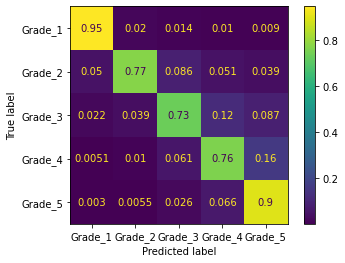

Classification report: 

              precision    recall  f1-score   support

     Grade_1       0.89      0.95      0.92     63007
     Grade_2       0.87      0.77      0.82     69799
     Grade_3       0.79      0.73      0.76    109199
     Grade_4       0.78      0.76      0.77    146850
     Grade_5       0.85      0.90      0.87    220820

    accuracy                           0.83    609675
   macro avg       0.83      0.82      0.83    609675
weighted avg       0.83      0.83      0.83    609675

Micro-F1 score: 

0.8274490507237464
Macro-F1 score:
0.8274490507237464


In [180]:
prediction_train = xgb_cls.predict(x_train_norm)

train_metrics = display_metrics(xgb_cls,
                               x_train_norm,
                               y_train, prediction_train)

Confusion matrix: 



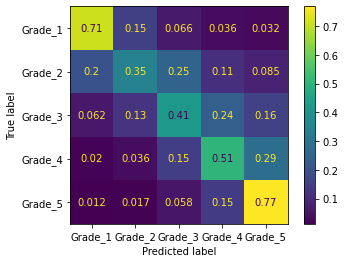

Classification report: 

              precision    recall  f1-score   support

     Grade_1       0.63      0.71      0.67     15808
     Grade_2       0.43      0.35      0.38     17458
     Grade_3       0.44      0.41      0.43     27213
     Grade_4       0.52      0.51      0.52     36994
     Grade_5       0.72      0.77      0.74     54946

    accuracy                           0.59    152419
   macro avg       0.55      0.55      0.55    152419
weighted avg       0.58      0.59      0.58    152419

Micro-F1 score: 

0.5876760771294918
Macro-F1 score:
0.5876760771294918


In [181]:
prediction_test = xgb_cls.predict(x_test_norm)

test_metrics = display_metrics(xgb_cls, 
                               x_test_norm,
                               y_test, prediction_test)

In [26]:
rnd_search.best_estimator_

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=19, max_features=7,
                                        min_samples_leaf=15,
                                        n_estimators=97))])

In [28]:
rnd_search.best_score_

0.5795464793847318

In [47]:
joblib.dump(rnd_search, 'results/rf_rs_orig.joblib', compress=1)

['results/rf_rs_orig.joblib']

In [ ]:
## XGBoost -> random search
## ROC curves
## NN

### -> check ROC curves, that requires looking at the prob scores and think of how to deal with multi-class problems

Micro-F1 is **the same** as accuracy in problems where each instance is assigned one (and only one) class
    https://simonhessner.de/why-are-precision-recall-and-f1-score-equal-when-using-micro-averaging-in-a-multi-class-problem/

- accuracy is the average of the f1 scores
- macro avg is the average between the unweighted precision and recall averages
- weighted avg is the average between the (support)-weighted precision and recall averages

support is the number of instances in each class

### 1.2 Resampled set:

#### 1.2.1 Over-sampling with SMOTENC

In [50]:
x_train_smotenc = pd.read_csv('processed_data/resampling/x_train_smotenc.csv', index_col=0).reset_index(drop=True)
y_train_smotenc = pd.read_csv('processed_data/resampling/y_train_smotenc.csv', index_col=0).reset_index(drop=True)

C:\Users\aleciu\Anaconda3\envs\ml\lib\site-packages\numpy\lib\arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [55]:
rnd_search.fit(x_train_smotenc, y_train_smotenc.values.ravel())

Fitting 2 folds for each of 20 candidates, totalling 40 fits


RandomizedSearchCV(cv=2,
                   estimator=Pipeline(steps=[('standardscaler',
                                              StandardScaler()),
                                             ('randomforestclassifier',
                                              RandomForestClassifier())]),
                   n_iter=20, n_jobs=3,
                   param_distributions={'randomforestclassifier__max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000014E42F56E88>,
                                        'randomforestclassifier__max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000014E00764108>,
                                        'randomforestclassifier__min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000014E000776C8>,
                                        'randomforestclassifier__n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000014E00718C08>},
                   random_state=4

In [56]:
rnd_search.best_estimator_

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=19, max_features=7,
                                        min_samples_leaf=15,
                                        n_estimators=97))])

In [57]:
rnd_search.best_score_

0.6117190471877547

In [58]:
joblib.dump(rnd_search, 'results/rf_rs_smotenc.joblib', compress=1)

['results/rf_rs_smotenc.joblib']

### 1.2.2 Under-sampling: cleaning oversampled dataset

#### 1.2.2.1 Tomek

In [60]:
x_train_smotenc_tmk = pd.read_csv('processed_data/resampling/x_train_smotenc_tmk.csv', index_col=0).reset_index(drop=True)
y_train_smotenc_tmk = pd.read_csv('processed_data/resampling/y_train_smotenc_tmk.csv', index_col=0).reset_index(drop=True)

In [61]:
rnd_search.fit(x_train_smotenc_tmk, y_train_smotenc_tmk.values.ravel())

Fitting 2 folds for each of 20 candidates, totalling 40 fits


RandomizedSearchCV(cv=2,
                   estimator=Pipeline(steps=[('standardscaler',
                                              StandardScaler()),
                                             ('randomforestclassifier',
                                              RandomForestClassifier())]),
                   n_iter=20, n_jobs=3,
                   param_distributions={'randomforestclassifier__max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000014E42F56E88>,
                                        'randomforestclassifier__max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000014E00764108>,
                                        'randomforestclassifier__min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000014E000776C8>,
                                        'randomforestclassifier__n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000014E00718C08>},
                   random_state=4

In [62]:
rnd_search.best_estimator_

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=19, max_features=7,
                                        min_samples_leaf=15,
                                        n_estimators=97))])

In [63]:
rnd_search.best_score_

0.6217190870037967

In [64]:
joblib.dump(rnd_search, 'results/rf_rs_smotenc_tmk.joblib', compress=1)

['results/rf_rs_smotenc_tmk.joblib']

#### 1.2.2.2 ENN

In [65]:
x_train_smotenc_enn = pd.read_csv('processed_data/resampling/x_train_smotenc_enn.csv', index_col=0).reset_index(drop=True)
y_train_smotenc_enn = pd.read_csv('processed_data/resampling/y_train_smotenc_enn.csv', index_col=0).reset_index(drop=True)

In [66]:
rnd_search.fit(x_train_smotenc_enn, y_train_smotenc_enn.values.ravel())

Fitting 2 folds for each of 20 candidates, totalling 40 fits


RandomizedSearchCV(cv=2,
                   estimator=Pipeline(steps=[('standardscaler',
                                              StandardScaler()),
                                             ('randomforestclassifier',
                                              RandomForestClassifier())]),
                   n_iter=20, n_jobs=3,
                   param_distributions={'randomforestclassifier__max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000014E42F56E88>,
                                        'randomforestclassifier__max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000014E00764108>,
                                        'randomforestclassifier__min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000014E000776C8>,
                                        'randomforestclassifier__n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000014E00718C08>},
                   random_state=4

In [67]:
rnd_search.best_estimator_

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=19, max_features=7,
                                        min_samples_leaf=15,
                                        n_estimators=97))])

In [68]:
rnd_search.best_score_

0.6595177062565271

In [69]:
joblib.dump(rnd_search, 'results/rf_rs_smotenc_enn.joblib', compress=1)

['results/rf_rs_smotenc_enn.joblib']